# Open and visualize the data

In [1]:
import pandas as pd
import datetime

In [4]:
PATH_CSV="/Users/iris/Documents/radar_deep/Radar_Traffic_Counts.csv"

In [59]:
df=pd.read_csv(PATH_CSV)

In [60]:
df.head()

,location_name,location_latitude,location_longitude,Year,Month,Day,Day of Week,Hour,Minute,Time Bin,Direction,Volume
0,2021 BLK KINNEY AVE (NW 300ft NW of Lamar),30.248691,-97.770409,2018,1,23,2,22,15,22:15,None,4
1,CAPITAL OF TEXAS HWY / LAKEWOOD DR,30.371674,-97.785660,2017,12,16,6,19,45,19:45,NB,103
2,400 BLK AZIE MORTON RD (South of Barton Spring...,30.264245,-97.765802,2018,1,23,2,21,45,21:45,SB,44
3,400 BLK AZIE MORTON RD (South of Barton Spring...,30.264245,-97.765802,2018,1,23,2,21,45,21:45,NB,13
4,2021 BLK KINNEY AVE (NW 300ft NW of Lamar),30.248691,-97.770409,2018,1,23,2,22,15,22:15,None,0


<class 'pandas.core.frame.DataFrame'>
<class 'str'>


In [61]:
df["datetime_time"]=df.apply(lambda x: datetime.datetime(x.Year,x.Month,x.Day,x.Hour,x.Minute),axis=1)

In [62]:
df.columns

Index(['location_name', 'location_latitude', 'location_longitude', 'Year',
       'Month', 'Day', 'Day of Week', 'Hour', 'Minute', 'Time Bin',
       'Direction', 'Volume', 'datetime_time'],
      dtype='object')

In [63]:
df["datetime_time"].unique()[:10]

array(['2018-01-23T22:15:00.000000000', '2017-12-16T19:45:00.000000000',
       '2018-01-23T21:45:00.000000000', '2017-12-16T19:30:00.000000000',
       '2018-01-23T22:00:00.000000000', '2018-08-13T21:00:00.000000000',
       '2018-01-23T22:30:00.000000000', '2018-01-23T22:45:00.000000000',
       '2018-01-23T23:00:00.000000000', '2018-02-06T10:45:00.000000000'],
      dtype='datetime64[ns]')

In [65]:
print(df['location_name'].unique().shape)
radar1=df['location_name'].unique()[0]

(23,)


In [12]:
radar1

'2021 BLK KINNEY AVE (NW 300ft NW of Lamar)'

In [25]:
df[["Day","Month","Year"]][df['location_name']==radar1] #we can seet we have data for each 

,Day,Month,Year
0,23,1,2018
4,23,1,2018
21,23,1,2018
67,23,1,2018
68,23,1,2018
...,...,...,...
1483732,12,9,2017
1483821,12,9,2017
1483822,12,9,2017
1483823,12,9,2017


In [30]:
df[""][df['location_name']==radar1].unique()

array(['22:15', '22:00', '22:30', '22:45', '23:00', '23:15', '23:30',
       '23:45', '11:15', '00:00', '00:15', '00:30', '00:45', '01:15',
       '01:00', '11:00', '01:30', '02:00', '01:45', '02:15', '02:30',
       '02:45', '03:00', '11:30', '03:15', '03:30', '03:45', '04:00',
       '04:15', '04:30', '04:45', '11:45', '05:00', '05:15', '05:30',
       '05:45', '06:00', '12:00', '06:30', '06:15', '06:45', '07:00',
       '07:15', '07:30', '07:45', '08:15', '08:00', '08:30', '12:15',
       '08:45', '09:00', '09:15', '09:30', '09:45', '10:00', '10:15',
       '12:30', '10:45', '10:30', '12:45', '13:00', '13:15', '13:45',
       '13:30', '14:00', '14:30', '14:15', '14:45', '15:00', '15:15',
       '15:30', '15:45', '16:00', '16:15', '16:30', '16:45', '17:15',
       '17:00', '17:30', '17:45', '18:00', '18:15', '18:30', '19:00',
       '18:45', '19:15', '19:30', '19:45', '20:00', '20:15', '20:30',
       '20:45', '21:00', '21:30', '21:15', '21:45'], dtype=object)

In [27]:
sub_df=df[["Hour","Minute","Time Bin","Direction","Volume"]][(df['location_name']==radar1)|(df["Day"]==23)|(df["Month"]==1)|(df["Year"]==2018)]

In [28]:
sub_df

,Hour,Minute,Time Bin,Direction,Volume
0,22,15,22:15,None,4
2,21,45,21:45,SB,44
3,21,45,21:45,NB,13
4,22,15,22:15,None,0
5,22,15,22:15,SB,26
...,...,...,...,...,...
4603808,15,15,15:15,None,143
4603809,15,0,15:00,NB,157
4603810,9,0,09:00,SB,20
4603811,3,15,03:15,NB,4


In [ ]:
# It seems that some radar has collect data with no direction ...


In [39]:
sub_df[(sub_df["Direction"]=="SB")|(sub_df["Hour"]==21)]

,Hour,Minute,Time Bin,Direction,Volume
2,21,45,21:45,SB,44
3,21,45,21:45,NB,13
5,22,15,22:15,SB,26
6,22,15,22:15,SB,31
7,22,15,22:15,SB,12
...,...,...,...,...,...
4603724,5,45,05:45,SB,19
4603727,5,0,05:00,SB,1
4603728,0,0,00:00,SB,0
4603810,9,0,09:00,SB,20


<AxesSubplot:xlabel='Time Bin'>

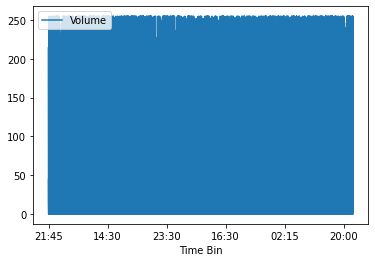

In [36]:
sub_df[(sub_df["Direction"]=="SB")].plot(x="Time Bin",y="Volume")